In [1]:
from utils import reader_csv, get_exp_info, gaus_fit, edep_plot
import numpy as np
import matplotlib.pyplot as plt
import utils
from scipy.interpolate import griddata
import json
import lmfit
path = './data/pos_10_1000.csv'
nofCells = 40
num = 1000


In [2]:
egap, labs, lgap, lsen, eSen, eAbs = reader_csv(path)
energys, position = get_exp_info(eSen*1e-3)
energys.shape, position.shape

((100,), (100, 2))

In [10]:
def pos_gaus(pos,bins=50):
    h,bins = np.histogram(pos, bins=bins)
    x = 0.5*(bins[1:]+bins[:-1])
    mod = lmfit.models.GaussianModel()
    pars = mod.make_params(amplitude=h.max(), mean=0, stddev=1)
    out = mod.fit(h, pars, x=x)
    return out

(array([ 1.,  1.,  2.,  3.,  2.,  5.,  7.,  7., 12., 11.,  5., 10.,  8.,
         5.,  6.,  2.,  4.,  4.,  4.,  1.]),
 array([-0.22162095, -0.20050999, -0.17939904, -0.15828808, -0.13717713,
        -0.11606617, -0.09495522, -0.07384427, -0.05273331, -0.03162236,
        -0.0105114 ,  0.01059955,  0.03171051,  0.05282146,  0.07393242,
         0.09504337,  0.11615432,  0.13726528,  0.15837623,  0.17948719,
         0.20059814]),
 <BarContainer object of 20 artists>)

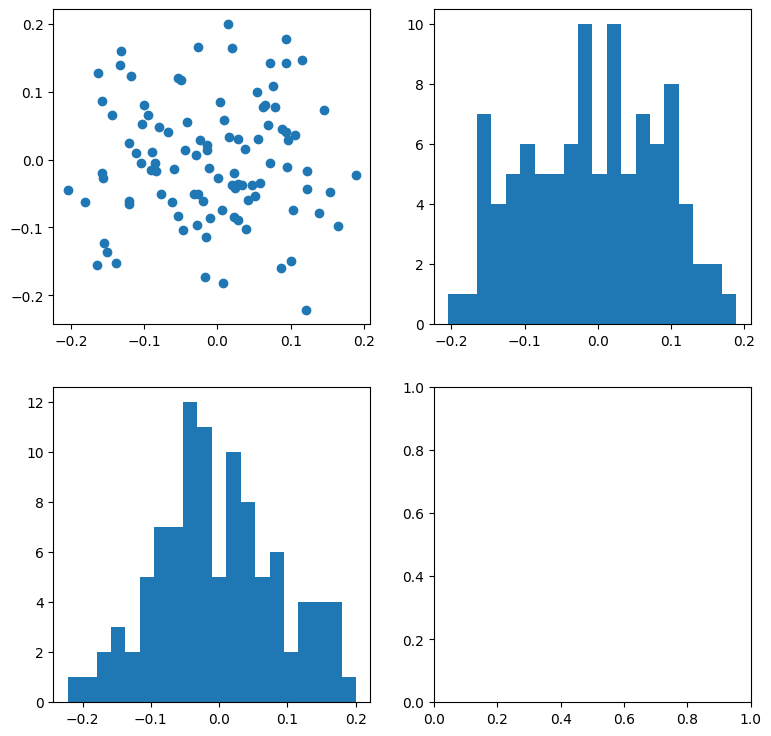

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
ax:plt.Axes = axs[0,0]
ax.scatter(position[:,0], position[:,1])
ax:plt.Axes = axs[0,1]
ax.hist(position[:,0], bins=20)
ax:plt.Axes = axs[1,0]
ax.hist(position[:,1], bins=20)

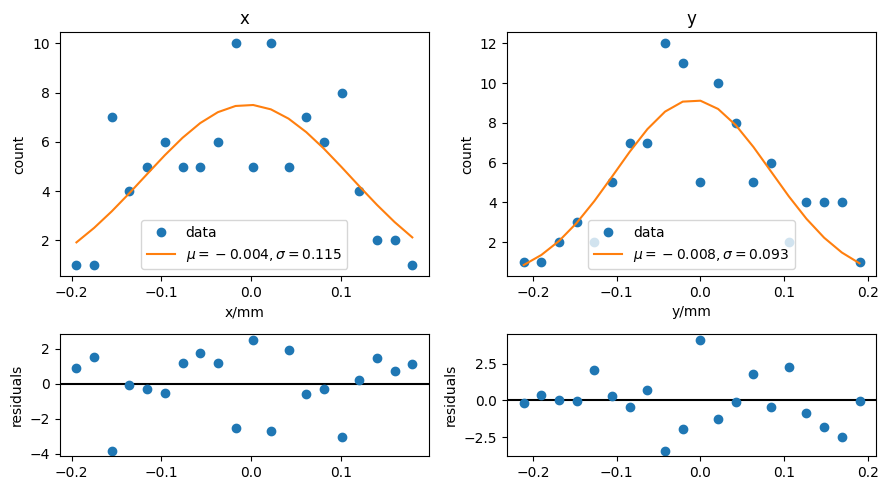

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(9, 5),height_ratios=[2,1])
out1 = pos_gaus(position[:,0],bins=20)
out1.plot_fit(axs[0,0])
out1.plot_residuals(axs[1,0])
axs[0,0].set_title("x")
axs[0,0].set_xlabel("x/mm")
axs[0,0].set_ylabel("count")
axs[0,0].legend(["data",f"$\\mu={out1.best_values['center']:.3f},\\sigma={out1.best_values['sigma']:.3f}$"])
axs[1,0].set_title("")
out2 = pos_gaus(position[:,1],bins=20)
out2.plot_fit(axs[0,1])
out2.plot_residuals(axs[1,1])
axs[0,1].set_title("y")
axs[0,1].set_xlabel("y/mm")
axs[0,1].set_ylabel("count")
axs[0,1].legend(["data",f"$\\mu={out2.best_values['center']:.3f},\\sigma={out2.best_values['sigma']:.3f}$"])
axs[1,1].set_title("")
plt.tight_layout()